# Ground gravity of Southern Africa

This is a public domain compilation of ground measurements of gravity from Southern Africa distributed by the [NOAA NCEI](https://www.ngdc.noaa.gov/). From the [dataset description](https://www.ngdc.noaa.gov/mgg/gravity/1999/data/regional/africa/africa.txt):

> This data base (14,559 records) was received in January 1986. Principal gravity parameters include elevation and observed gravity.  The observed gravity values are referenced to the International Gravity Standardization Net 1971 (IGSN 71).  The data are randomly distributed within the boundaries of the Republic of South Africa.

Data download location: https://www.ngdc.noaa.gov/mgg/gravity/1999/data/regional/africa/

The horizontal datum is not specified and heights are referenced to "sea level", which we will interpret as the geoid (which realization is likely not relevant since the uncertainty in the height is probably larger than geoid model differences).

Here, we will download and repackage the data (position and absolute gravity value, no anomalies) into a CSV file. Heights will remain the same and we'll conversion to geometric heights to be done in tutorials for better educational purposes.

License: [public domain](https://www.ngdc.noaa.gov/ngdcinfo/privacy.html#copyright-notice)

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import verde as vd
import pooch
import pygmt

## Download the data

Download the text version of the data from the NOAA servers.

In [2]:
fname = pooch.retrieve(
    url="https://www.ngdc.noaa.gov/mgg/gravity/1999/data/regional/africa/africa.ast",
    known_hash="md5:9eab1ed16d1689f4da579e7084fe1203",
)

In [3]:
print(f"size: {os.path.getsize(fname) / 1e6} Mb")

size: 0.611478 Mb


## Read the data

Use pandas to read the data and set column names (they aren't in the file).

In [4]:
data = pd.read_csv(
    fname, 
    delim_whitespace=True, 
    header=None, 
    names=["latitude", "longitude", "height_sea_level_m", "gravity_mgal"],
)
data

,latitude,longitude,height_sea_level_m,gravity_mgal
0,-34.39150,17.71900,-589.0,979724.79
1,-34.48000,17.76100,-495.0,979712.90
2,-34.35400,17.77433,-406.0,979725.89
3,-34.13900,17.78500,-267.0,979701.20
4,-34.42200,17.80500,-373.0,979719.00
...,...,...,...,...
14554,-17.95833,21.22500,1053.1,978182.09
14555,-17.98333,21.27500,1033.3,978183.09
14556,-17.99166,21.70833,1041.8,978182.69
14557,-17.95833,21.85000,1033.3,978193.18


## Remove points well below sea level

Some points are 100s of meters below sea level. This is very suspicious and are potentially flawed heights from shipborne measurements. Remove these points (it's not many) just to be safe.

In [5]:
data = data[data.height_sea_level_m >= 0].reset_index(drop=True)
data

,latitude,longitude,height_sea_level_m,gravity_mgal
0,-34.12971,18.34444,32.2,979656.12
1,-34.08833,18.36028,592.5,979508.21
2,-34.19583,18.37418,18.4,979666.46
3,-34.23972,18.40388,25.0,979671.03
4,-34.16444,18.41112,228.7,979616.11
...,...,...,...,...
14354,-17.95833,21.22500,1053.1,978182.09
14355,-17.98333,21.27500,1033.3,978183.09
14356,-17.99166,21.70833,1041.8,978182.69
14357,-17.95833,21.85000,1033.3,978193.18


## Plot the data for inspection

Make a quick plot to make sure the data look OK.

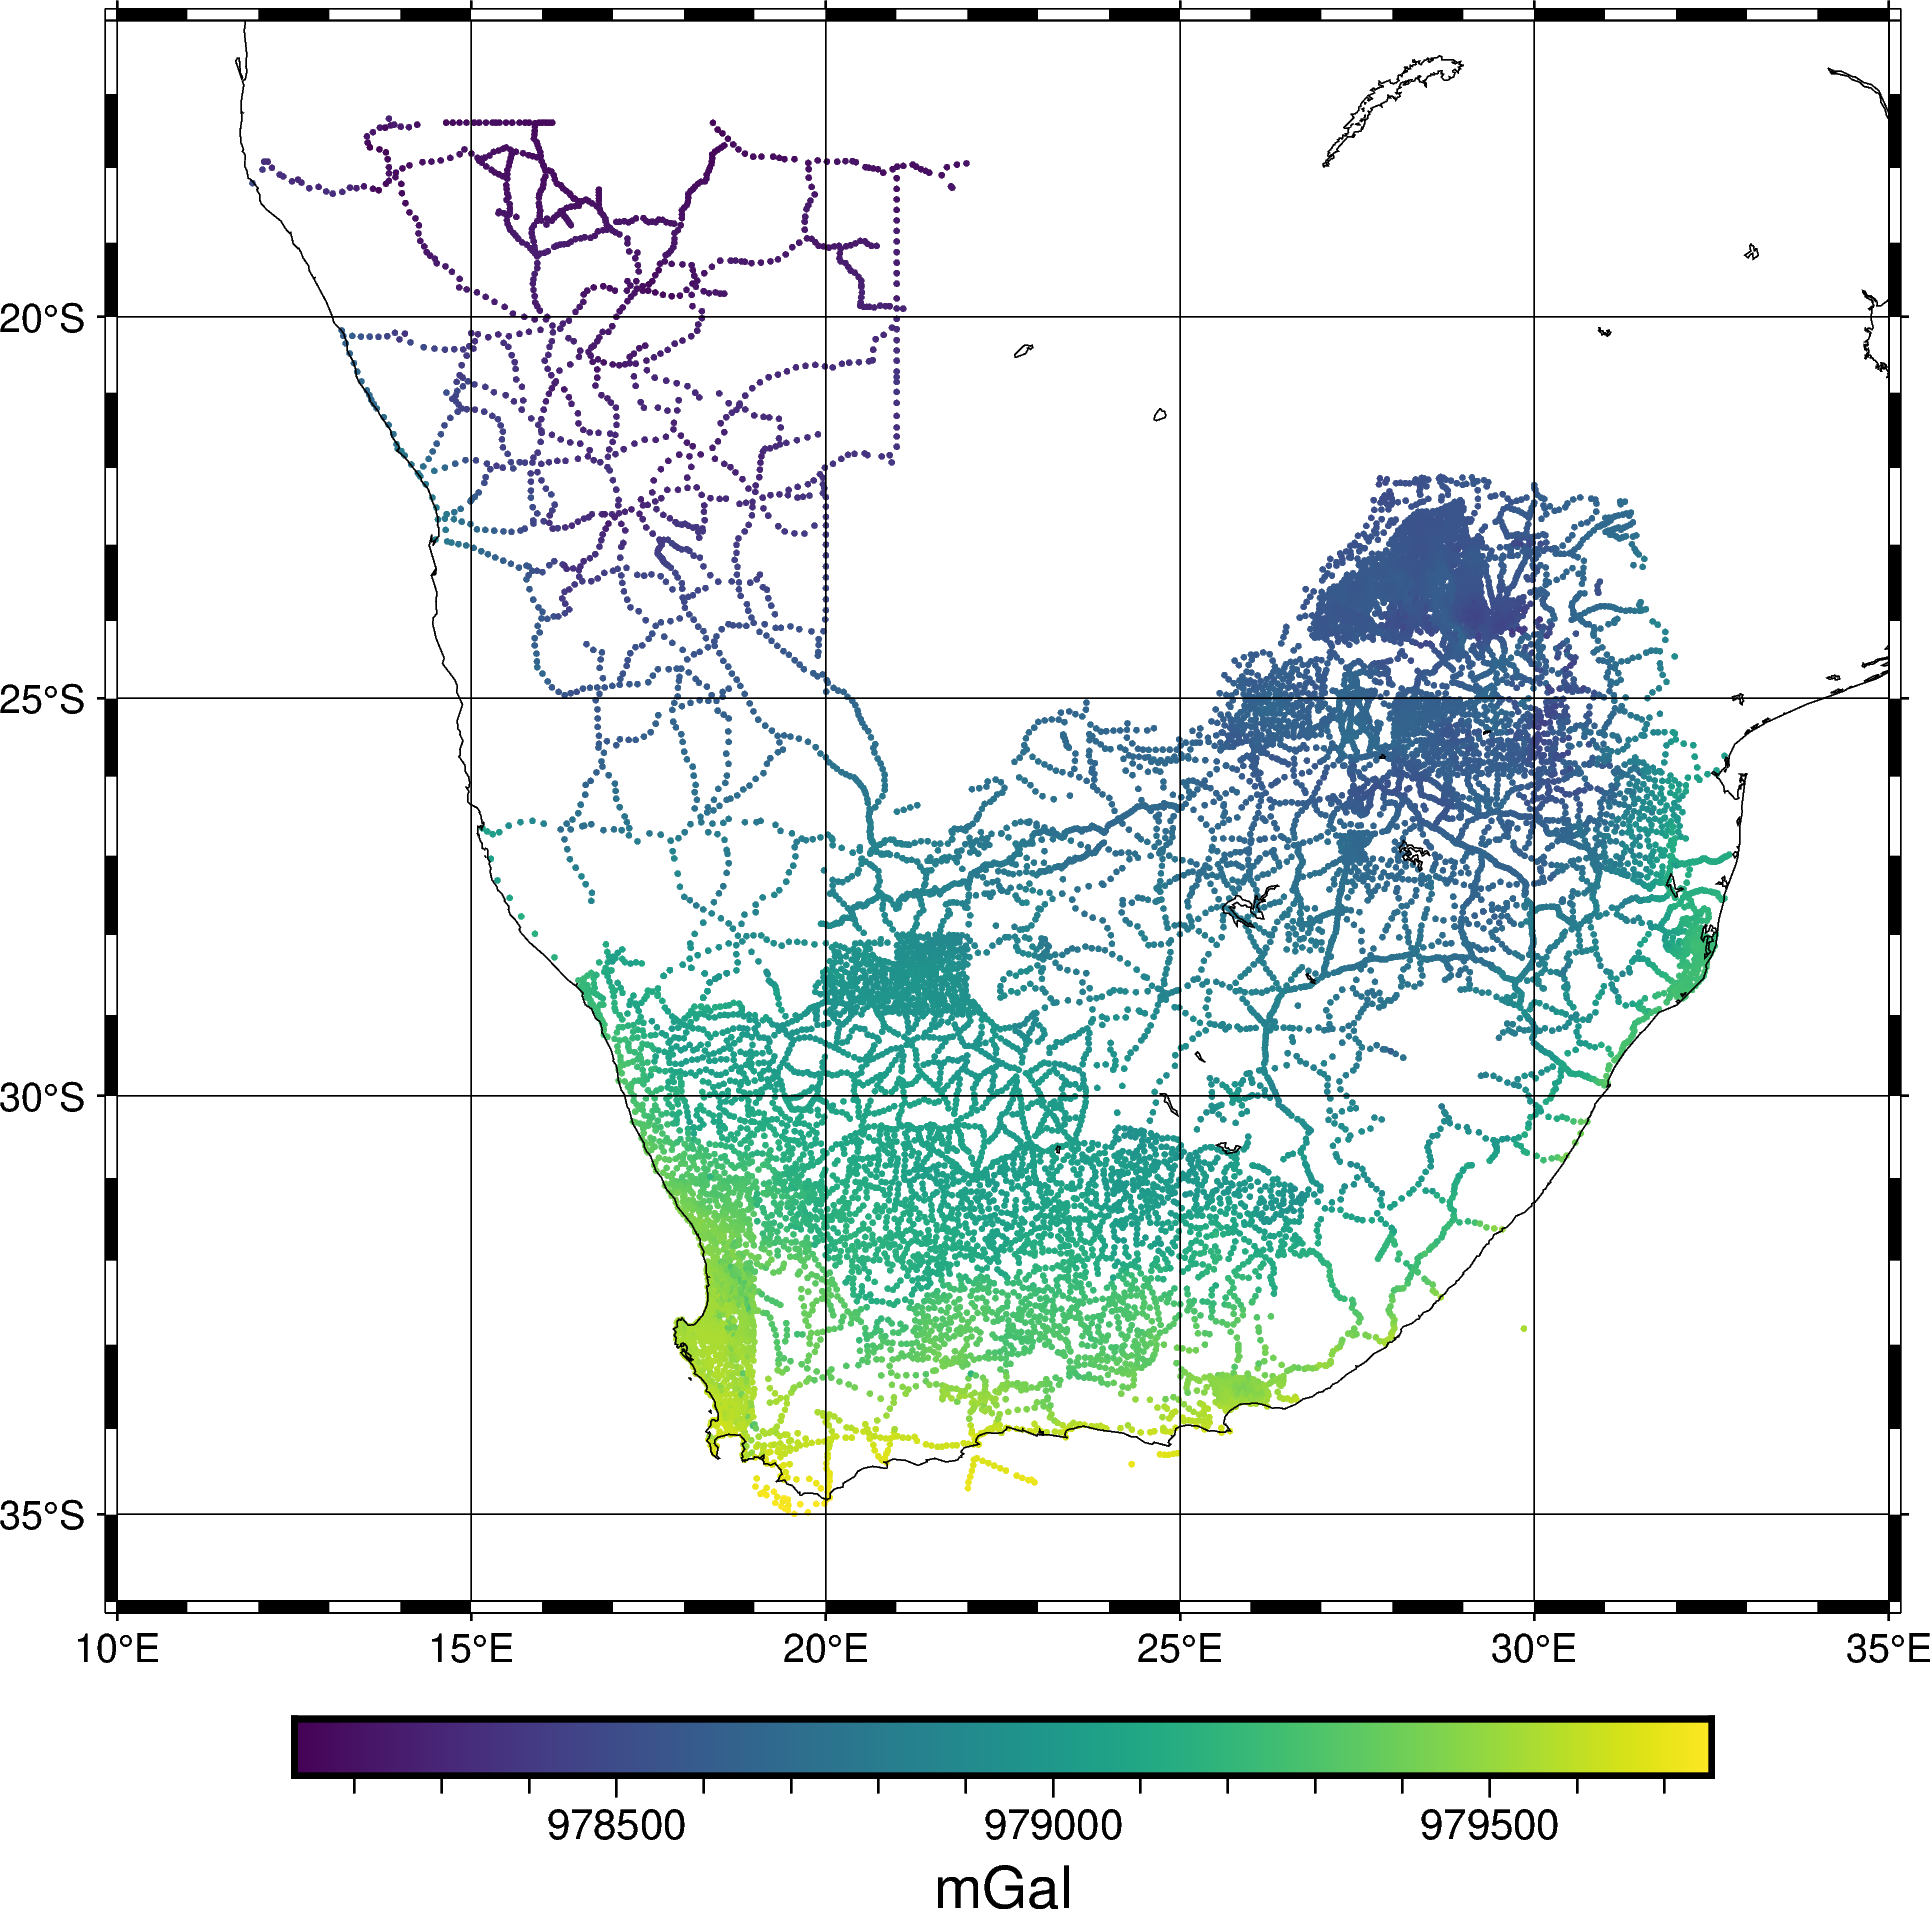

In [6]:
fig = pygmt.Figure()
pygmt.makecpt(cmap="viridis", series=[data.gravity_mgal.min(), data.gravity_mgal.max()])
fig.plot(
    x=data.longitude, 
    y=data.latitude, 
    style="c0.05c", 
    color=data.gravity_mgal, 
    cmap=True, 
    projection="M15c",
)
fig.colorbar(frame='af+l"mGal"', position="JBC+o0/1c")
fig.coast(shorelines=True)
fig.basemap(frame="afg")
fig.show()

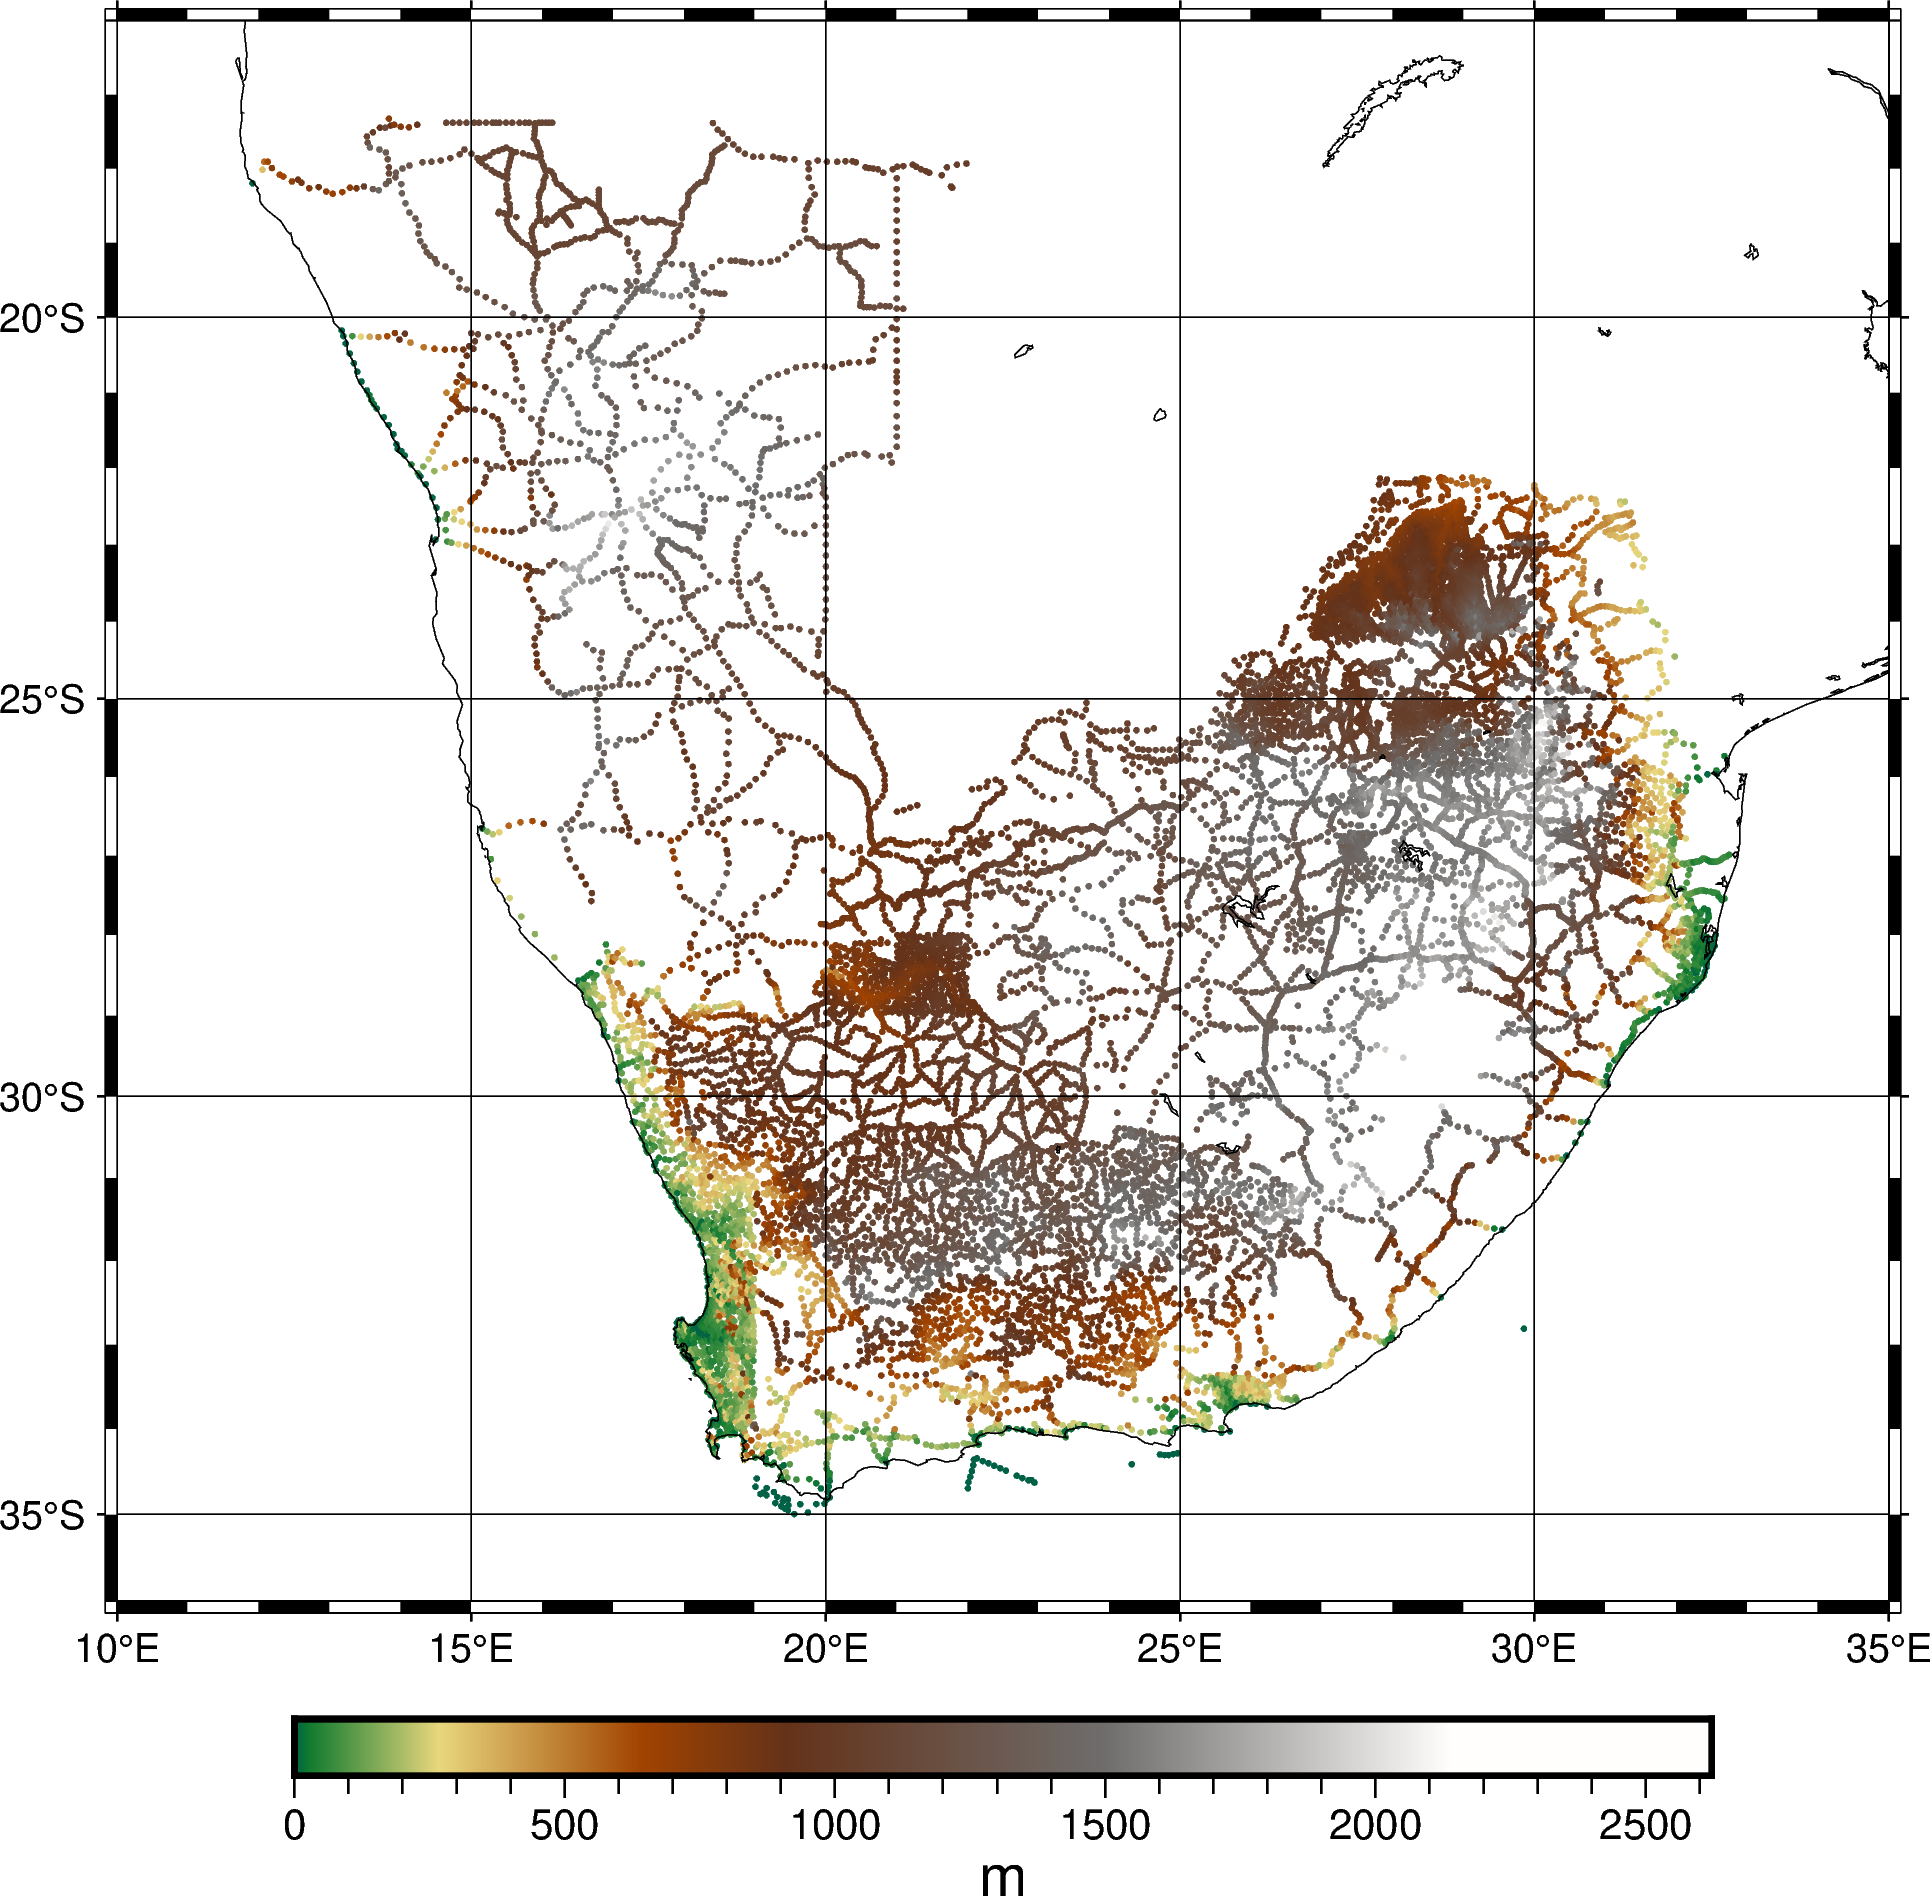

In [7]:
fig = pygmt.Figure()
pygmt.makecpt(cmap="geo", series=[data.height_sea_level_m.min(), data.height_sea_level_m.max()])
fig.plot(
    x=data.longitude, 
    y=data.latitude, 
    style="c0.05c", 
    color=data.height_sea_level_m, 
    cmap=True, 
    projection="M15c",
)
fig.colorbar(frame='af+l"m"', position="JBC+o0/1c")
fig.coast(shorelines=True)
fig.basemap(frame="afg")
fig.show()

## Export

Make a separate DataFrame to export to a compressed CSV.

In [8]:
export = pd.DataFrame({
    "longitude": data.longitude.map(lambda x: "{:.5f}".format(x)),
    "latitude": data.latitude.map(lambda x: "{:.5f}".format(x)),    
    "height_sea_level_m": data.height_sea_level_m.map(lambda x: "{:.1f}".format(x)),
    "gravity_mgal": data.gravity_mgal.map(lambda x: "{:.2f}".format(x)),
})
export

,longitude,latitude,height_sea_level_m,gravity_mgal
0,18.34444,-34.12971,32.2,979656.12
1,18.36028,-34.08833,592.5,979508.21
2,18.37418,-34.19583,18.4,979666.46
3,18.40388,-34.23972,25.0,979671.03
4,18.41112,-34.16444,228.7,979616.11
...,...,...,...,...
14354,21.22500,-17.95833,1053.1,978182.09
14355,21.27500,-17.98333,1033.3,978183.09
14356,21.70833,-17.99166,1041.8,978182.69
14357,21.85000,-17.95833,1033.3,978193.18


In [9]:
fname = "southern-africa-gravity.csv.xz"
export.to_csv(fname, index=False)
print(fname)
print(f"size: {os.path.getsize(fname) / 1e6} Mb")
for alg in ["md5", "sha256"]:
    print(f"{alg}:{pooch.file_hash(fname, alg=alg)}")

southern-africa-gravity.csv.xz
size: 0.138108 Mb
md5:1dee324a14e647855366d6eb01a1ef35
sha256:f5f8e5eb6cd97f104fbb739cf389113cbf28ca8ee003043fab720a0fa7262cac


## Read back the data and plot it

Verify that the output didn't corrupt anything.

In [10]:
grav = pd.read_csv(fname)
grav

,longitude,latitude,height_sea_level_m,gravity_mgal
0,18.34444,-34.12971,32.2,979656.12
1,18.36028,-34.08833,592.5,979508.21
2,18.37418,-34.19583,18.4,979666.46
3,18.40388,-34.23972,25.0,979671.03
4,18.41112,-34.16444,228.7,979616.11
...,...,...,...,...
14354,21.22500,-17.95833,1053.1,978182.09
14355,21.27500,-17.98333,1033.3,978183.09
14356,21.70833,-17.99166,1041.8,978182.69
14357,21.85000,-17.95833,1033.3,978193.18


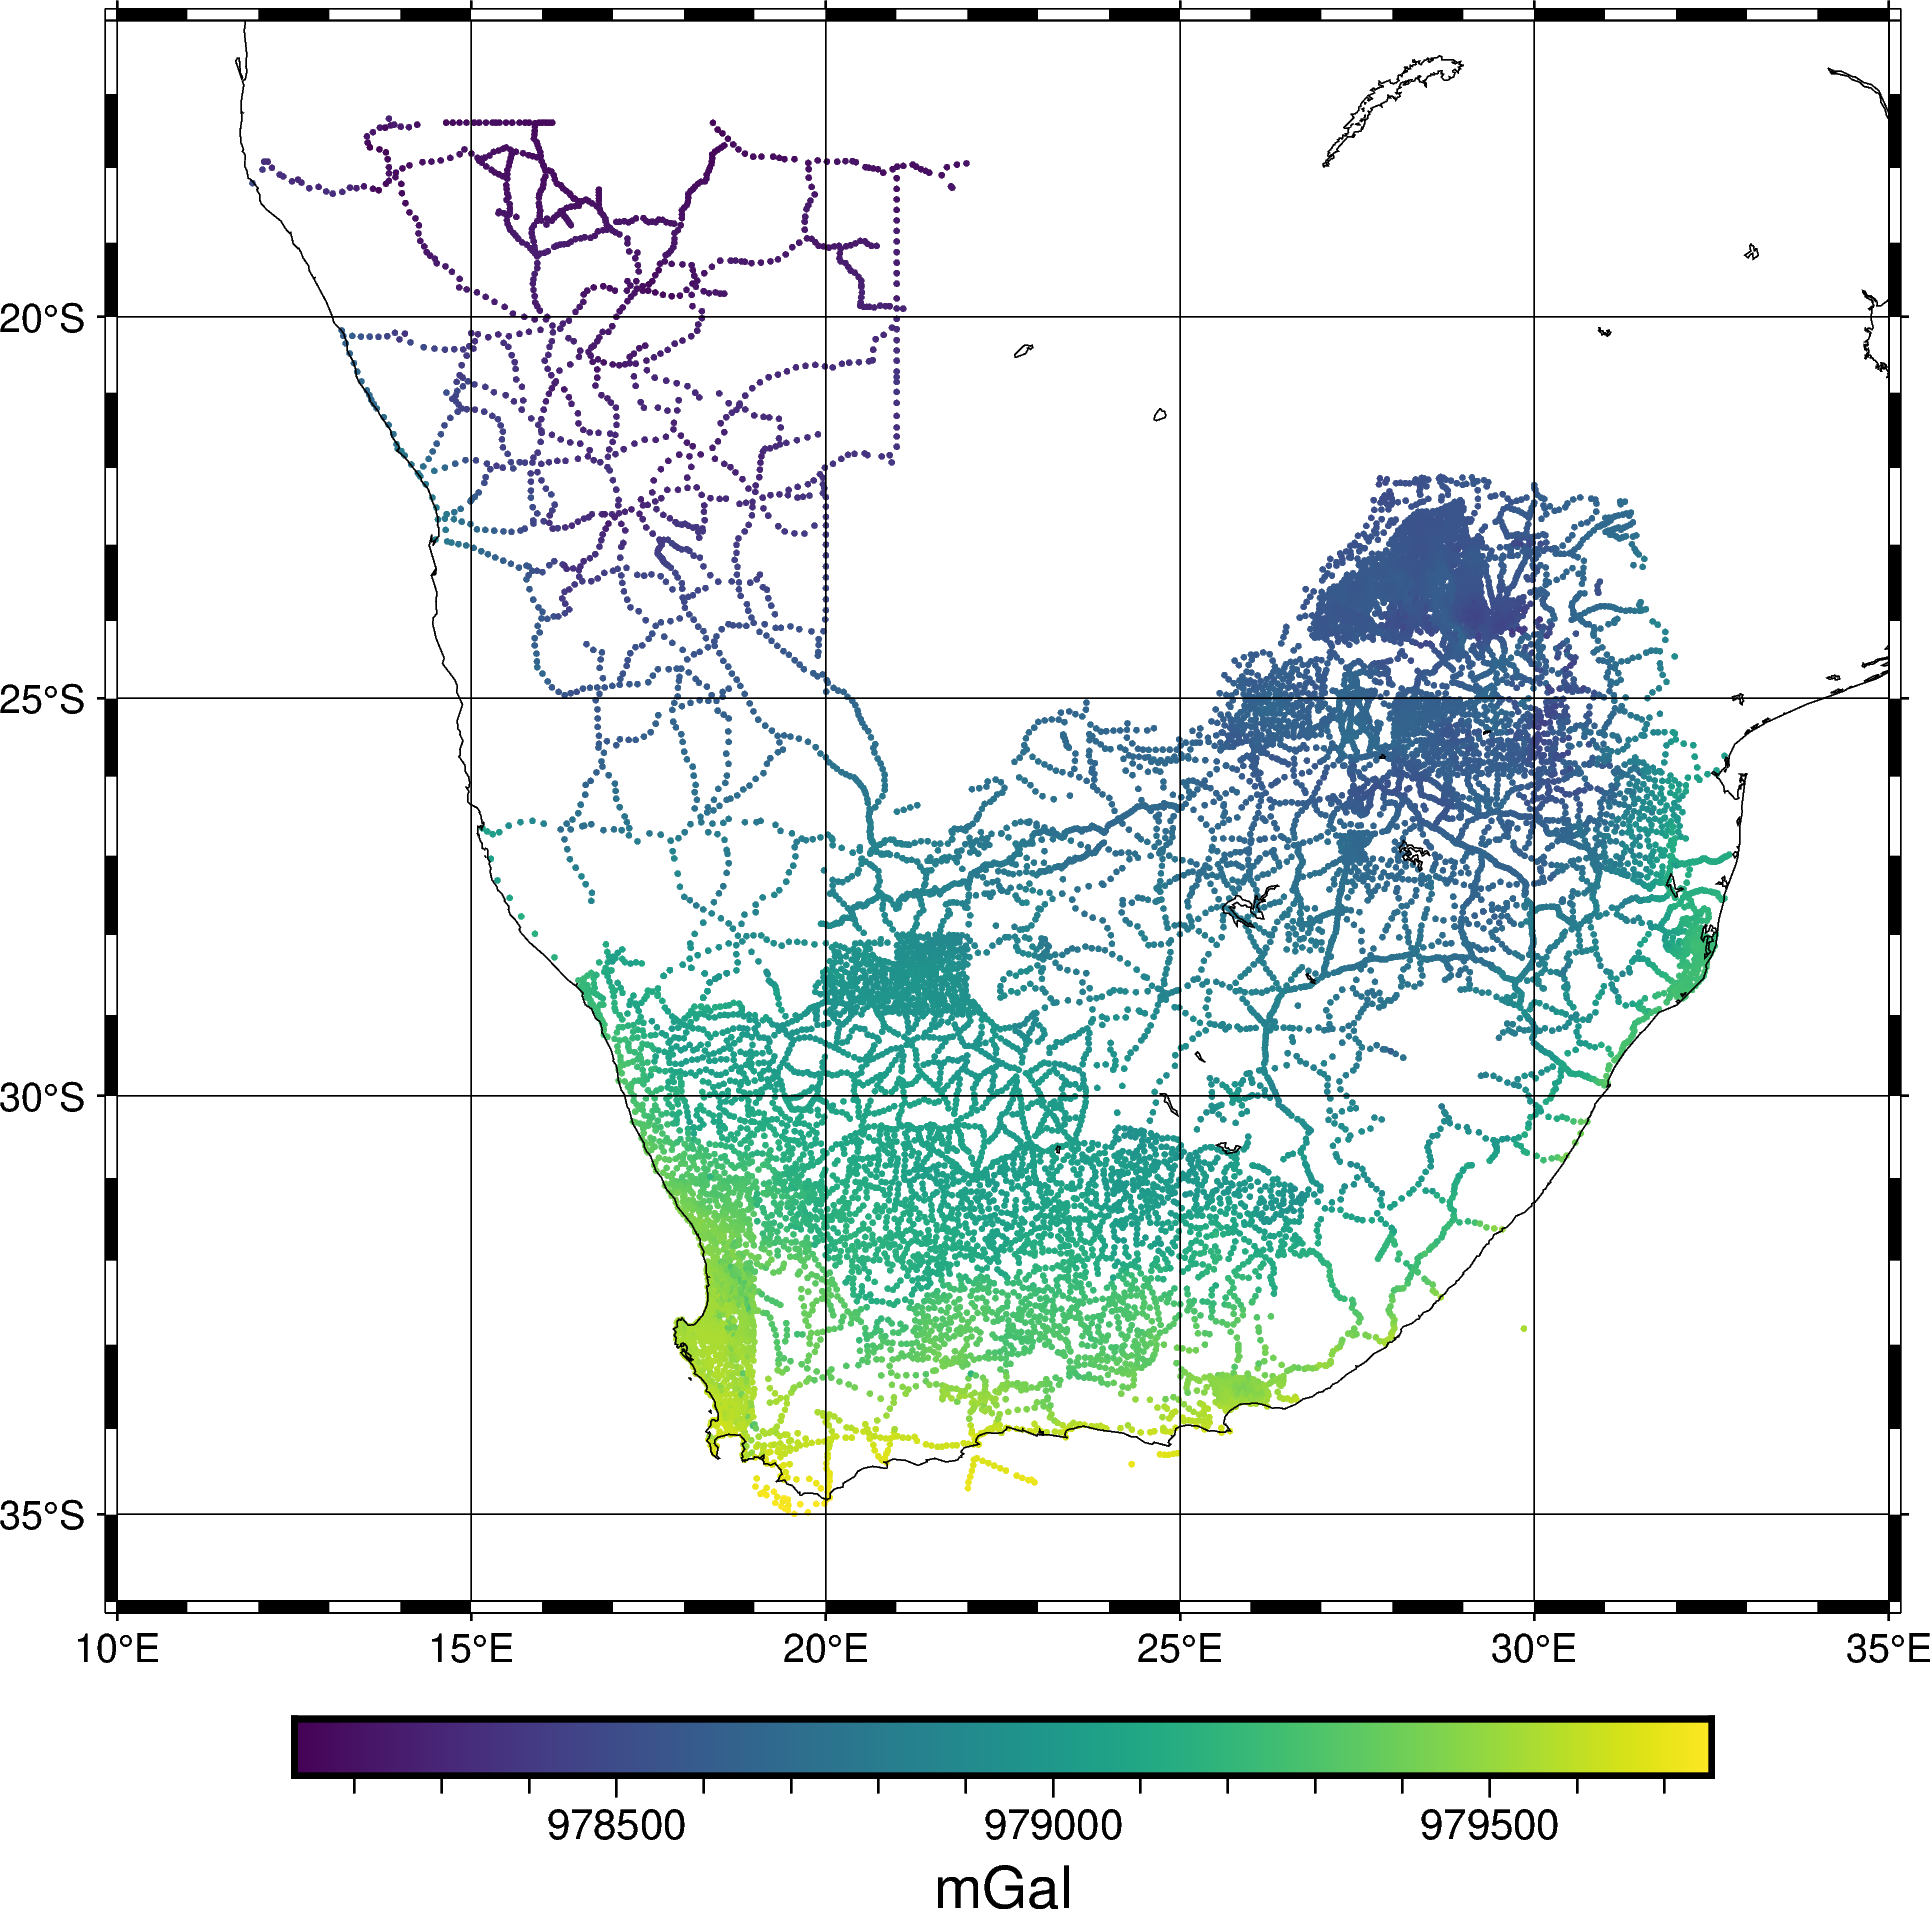

In [11]:
fig = pygmt.Figure()
pygmt.makecpt(cmap="viridis", series=[grav.gravity_mgal.min(), grav.gravity_mgal.max()])
fig.plot(
    x=grav.longitude, 
    y=grav.latitude, 
    style="c0.05c", 
    color=grav.gravity_mgal, 
    cmap=True, 
    projection="M15c",
)
fig.colorbar(frame='af+l"mGal"', position="JBC+o0/1c")
fig.coast(shorelines=True)
fig.basemap(frame="afg")
fig.show()